In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('Customer Personality Analysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
original_data = pd.read_csv('C:/Users/Admin/Desktop/Downloads/Unemployment/Customer Personality Analysis.csv', sep='\t')

In [3]:
original_data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [4]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Pre-processing the data

In [5]:
# Remove rows with null values
my_data = original_data.dropna(subset=['Income'])
# Remove rows with duplicated values
my_data = my_data.drop_duplicates()

In [6]:
my_data['Dt_Customer'] = pd.to_datetime(my_data['Dt_Customer'], format="%d-%m-%Y")

my_data['days_customer_for'] = (my_data['Dt_Customer'].max() - my_data['Dt_Customer']).dt.days
my_data['total_children'] = my_data['Kidhome'] + my_data['Teenhome']
my_data['total_count'] = my_data['NumWebPurchases'] + my_data['NumCatalogPurchases'] + my_data['NumStorePurchases']
my_data['total_amount'] = my_data['MntWines'] + my_data['MntFruits'] + my_data['MntMeatProducts'] + my_data['MntFishProducts'] + my_data['MntSweetProducts'] + my_data['MntGoldProds']

In [7]:
original_data[original_data['Income'] > 500000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  02-06-2013       23         9  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  

[1 rows x 29 columns]

In [8]:
# While I was modeling, I found that the income value of 666666 was somewhat disruptive, so I'm removing it.
my_data = my_data.drop(my_data[my_data['Income'] > 500000].index)

In [9]:
my_data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  \
0            0  2012-09-04       58       635  ...             0   
1            1  2014-03-08       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-02-10       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-06-10       56       406  ...             1   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0                0         0              3         11         1   
1                0         0              3         11         0   
2                0         0              3         11         0   
3                0         0              3         11         0   
4                0         0              3         11         0   
...            ...       ...            ...        ...       ...   
2235             0         0              3         11         0   
2236             0         0              3         11         0   
2237             0         0              3         11         0   
2238             0         0              3         11         0   
2239             0         0              3         11         1   

      days_customer_for  total_children  total_count  total_amount  
0                   663               0           22          1617  
1                   113               2            4            27  
2                   312               0           20           776  
3                   139               1            6            53  
4                   161               1           14           422  
...                 ...             ...          ...           ...  
2235                381               1           16          1341  
2236                 19               3           15           444  
2237                155               0           18          1241  
2238                156               1           21           843  
2239                622               2            8           172  

[2215 rows x 33 columns]

In [10]:
print(my_data['Education'].unique())
print(my_data['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


## Distribution of data

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

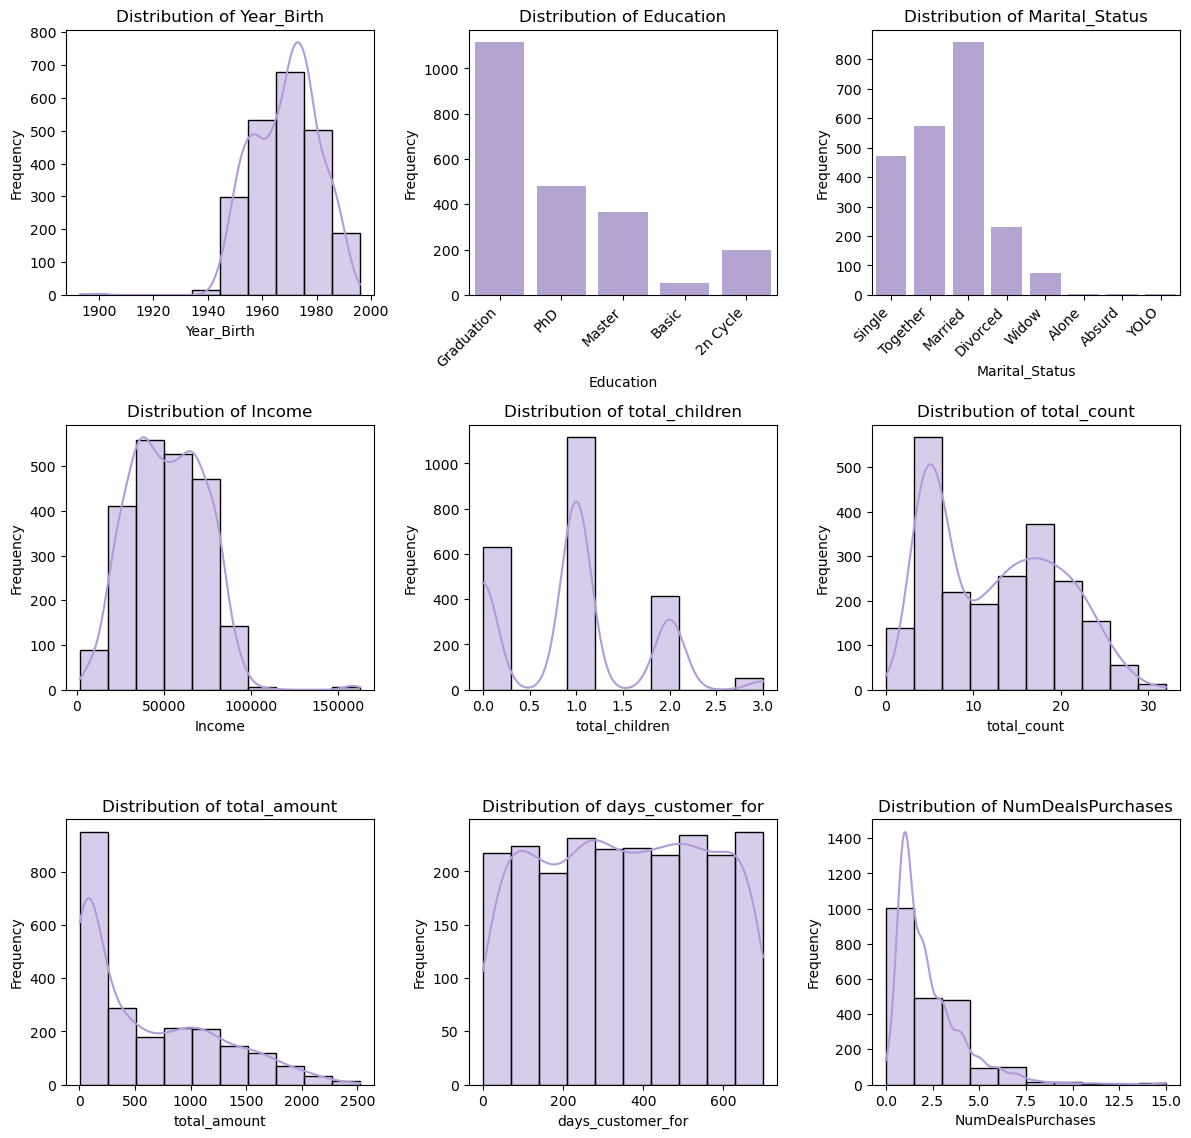

In [11]:
plt.figure(figsize=(12, 15))

columns_to_plot = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 
                   'total_children', 'total_count', 'total_amount', 'days_customer_for','NumDealsPurchases']

# Iterate over each column and plot accordingly
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(4, 3, i)
    if column == 'Dt_Customer':
        # For 'Dt_Customer', convert to datetime with the correct format
        my_data[column] = pd.to_datetime(my_data[column], format='%d-%m-%Y')
        sns.lineplot(data=my_data, x=column, y=my_data.index, marker='o')
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.title(f'Trend of {column}')
    elif my_data[column].dtype == 'object':
        # For categorical columns, plot as count plot
        sns.countplot(data=my_data, x=column, color='#B19CD9')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Distribution of {column}')
    else:
        # For numeric columns, plot as histogram
        sns.histplot(data=my_data, x=column, bins=10, kde=True, color='#B19CD9', edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

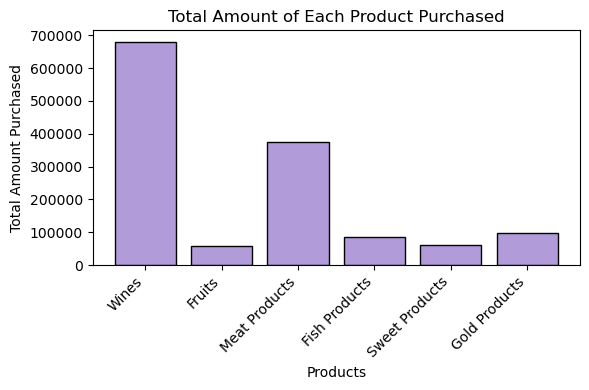

In [12]:
# Define the columns to plot
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                   'MntSweetProducts', 'MntGoldProds']

# Calculate the total amount of each product purchased
total_amounts = [original_data[column].sum() for column in columns_to_plot]

# Define the product names for the x-axis labels
product_names = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 
                 'Sweet Products', 'Gold Products']

# Create the bar graph
plt.figure(figsize=(6, 4))
plt.bar(product_names, total_amounts, color='#B19CD9', edgecolor='black')
plt.xlabel('Products')
plt.ylabel('Total Amount Purchased')
plt.title('Total Amount of Each Product Purchased')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

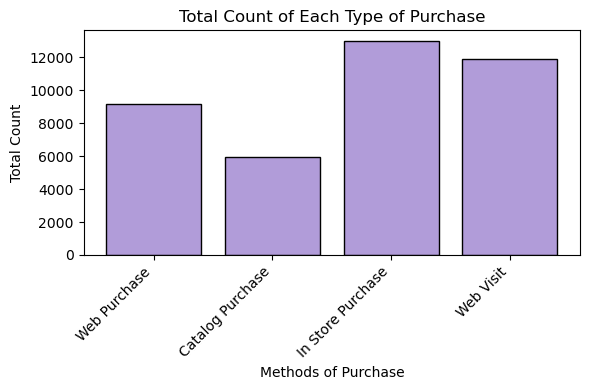

In [13]:
columns_to_plot = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

total_amounts = [original_data[column].sum() for column in columns_to_plot]

methods = ['Web Purchase', 'Catalog Purchase', 'In Store Purchase', 'Web Visit']

plt.figure(figsize=(6, 4))
plt.bar(methods, total_amounts, color='#B19CD9', edgecolor='black')
plt.xlabel('Methods of Purchase')
plt.ylabel('Total Count')
plt.title('Total Count of Each Type of Purchase')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [14]:
# Create a new column for categorized Education
education_categories = ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']
my_data['Education_Category'] = my_data['Education'].apply(
    lambda x: education_categories.index(x))

# Create a new column for categorized Marital_Status
# marital_status_categories = ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
# my_data['Marital_Status_Category'] = my_data['Marital_Status'].apply(
#     lambda x: marital_status_categories.index(x))

marital_status_categories = {'Single': 1, 'Together': 2, 'Married': 2, 'Divorced': 1, 'Widow': 1, 'Alone': 1, 'Absurd': 0, 'YOLO': 0}

# Create a new column for categorized marital status
my_data['Marital_Status_Category'] = my_data['Marital_Status'].map(marital_status_categories)

In [15]:
correlation_matrix = my_data[['Year_Birth', 'Education_Category', 'Marital_Status_Category', 'Income', 
                              'total_children', 'days_customer_for', 'MntWines', 'MntFruits', 
                              'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                              'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                              'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']].corr()

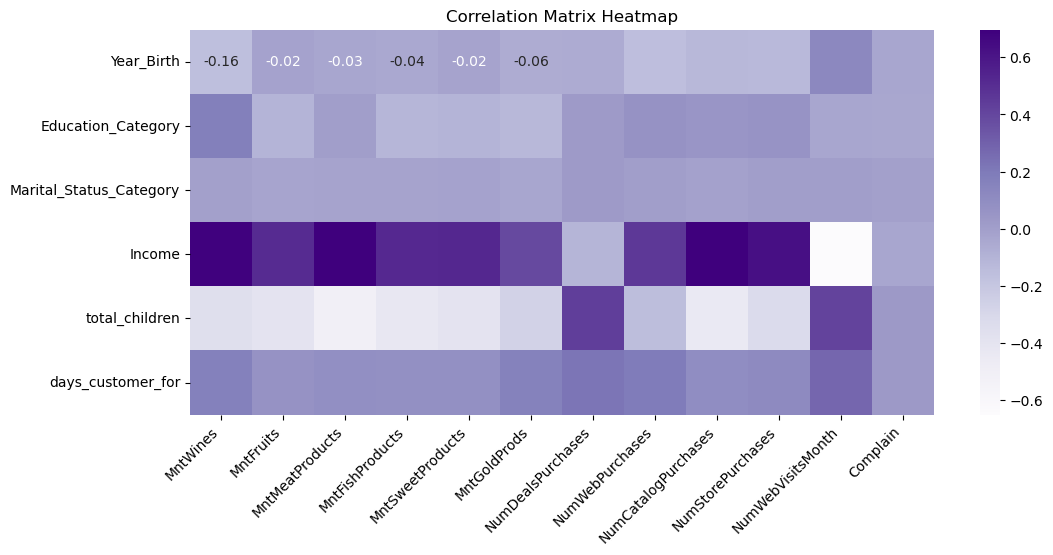

In [17]:
selected_correlation_matrix = correlation_matrix.loc[
    ['Year_Birth', 'Education_Category', 'Marital_Status_Category', 'Income', 'total_children', 'days_customer_for'], 
    ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']]

plt.figure(figsize=(12, 5))

sns.heatmap(selected_correlation_matrix, annot=True, cmap='Purples', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')

plt.show()

## Modeling

In [18]:
X = my_data[['Year_Birth', 'Education_Category', 'Marital_Status_Category', 
             'Income', 'total_children', 'days_customer_for', 
             'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
             'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
             'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
             'NumWebVisitsMonth', 'Complain']].copy()

In [19]:
#Create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<Axes: xlabel='0', ylabel='1'>

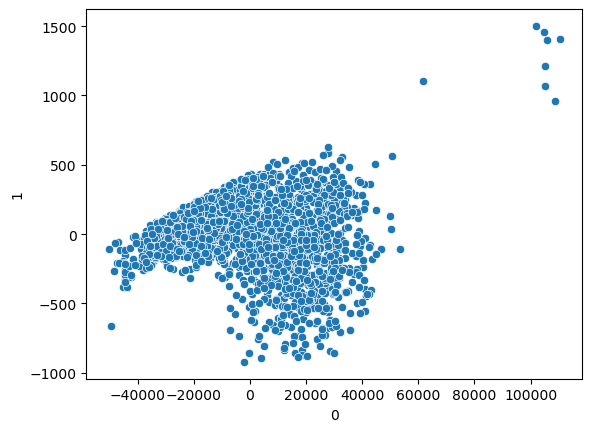

In [20]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

<Axes: xlabel='0', ylabel='1'>

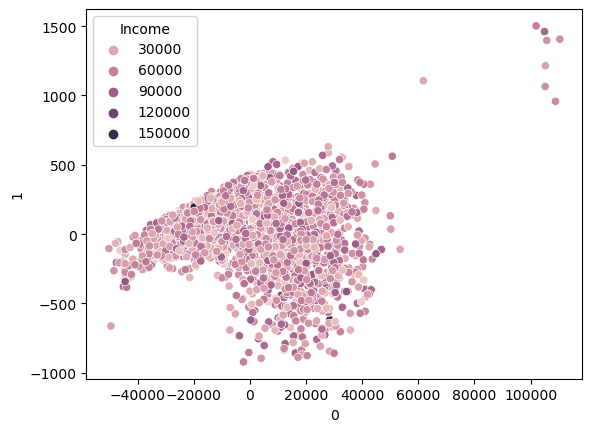

In [21]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=X.Income)
# Income doesn't seem to be relevant.

<Axes: xlabel='0', ylabel='1'>

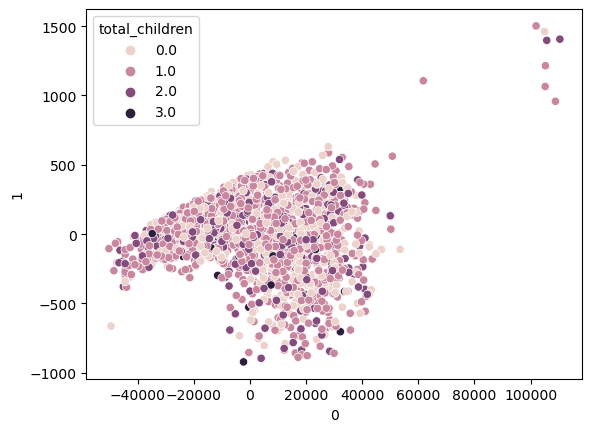

In [22]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=X.total_children)
# total_children doesn't seem to be relevant.

<Axes: xlabel='0', ylabel='1'>

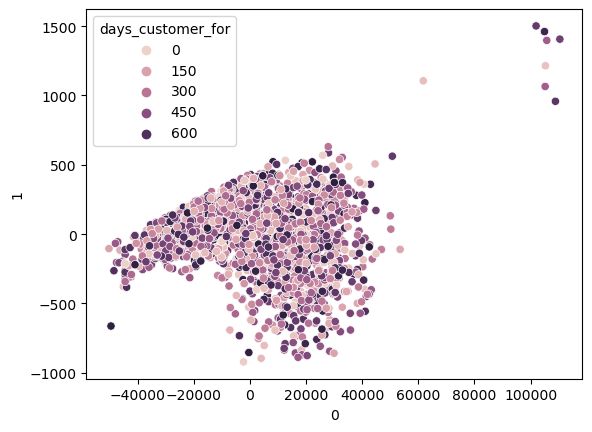

In [23]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=X.days_customer_for)
# days_customer_for doesn't seem to be relevant.

<Axes: xlabel='0', ylabel='1'>

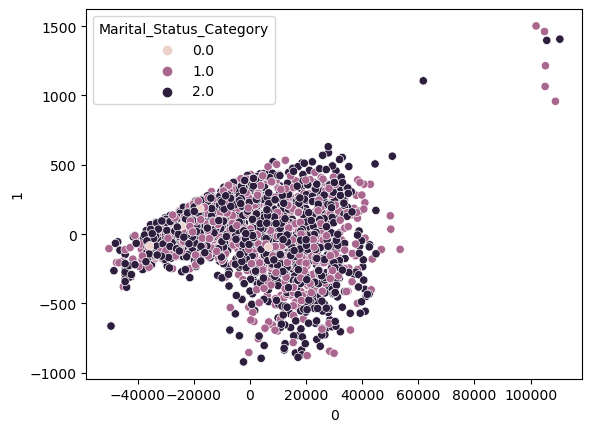

In [24]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=X.Marital_Status_Category)

## K-means

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\clust

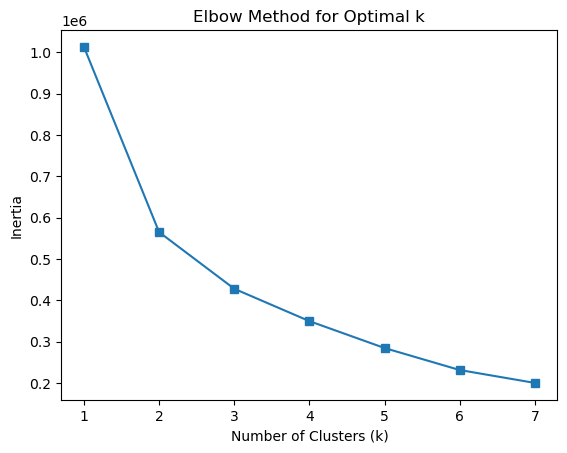

In [25]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

# Plot the elbow method graph
plt.plot(range(1, 8), inertia, marker='s')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 2 is the optimal number of clusters because the variance decreases significantly until 2, 
# and then starts to decrease at a slower rate afterwards.

In [26]:
#create KMeans model
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)
y = kmeans.fit_predict(X)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

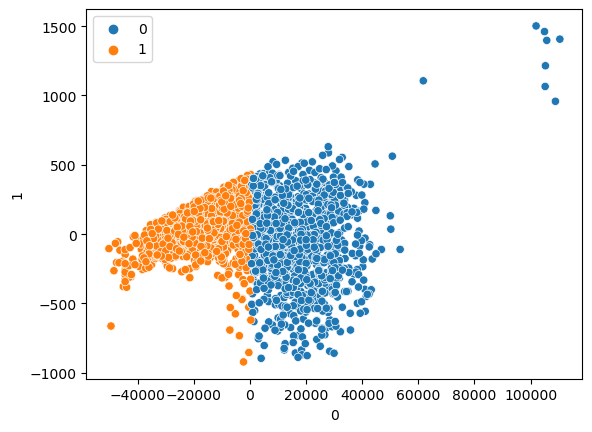

In [27]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<Axes: xlabel='Income', ylabel='MntWines'>

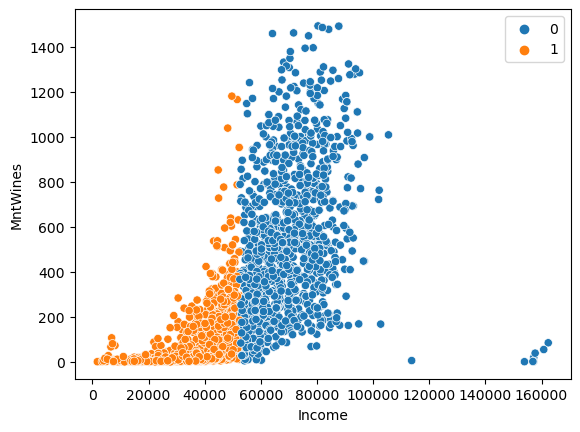

In [28]:
sns.scatterplot(x = X['Income'], y = X['MntWines'], hue=y)

<Axes: xlabel='Income', ylabel='MntMeatProducts'>

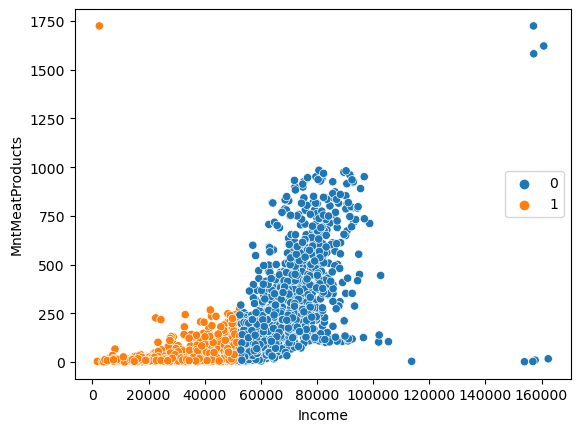

In [31]:
sns.scatterplot(x = X['Income'], y = X['MntMeatProducts'], hue=y)

In [32]:
sns.scatterplot(x = X['Income'], y = X['NumDealsPurchases'], hue=y)

<Axes: xlabel='Income', ylabel='NumDealsPurchases'>

<Axes: xlabel='total_children', ylabel='MntWines'>

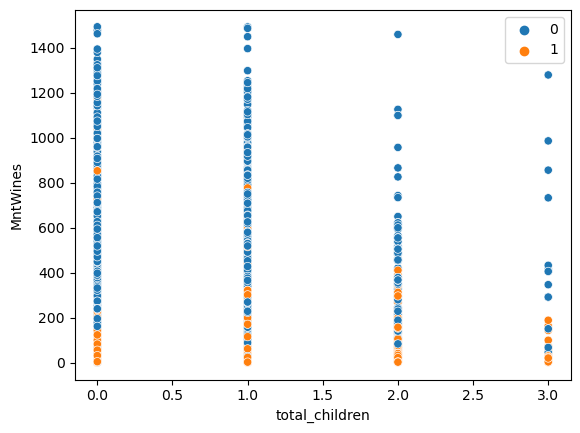

In [33]:
sns.scatterplot(x = X['total_children'], y = X['MntWines'], hue=y)

<Axes: xlabel='total_children', ylabel='MntMeatProducts'>

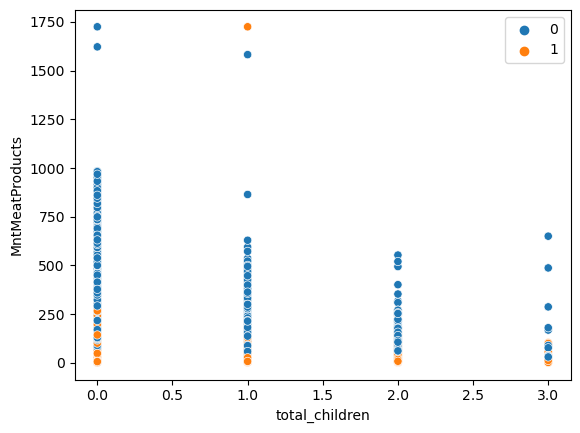

In [34]:
sns.scatterplot(x = X['total_children'], y = X['MntMeatProducts'], hue=y)

In [35]:
sns.scatterplot(x = X['total_children'], y = X['NumDealsPurchases'], hue=y)

<Axes: xlabel='total_children', ylabel='NumDealsPurchases'>

In [36]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([X, y_df], axis=1)

In [37]:
new_df.head()

Year_Birth  Education_Category  Marital_Status_Category   Income  \
0      1957.0                 1.0                      1.0  58138.0   
1      1954.0                 1.0                      1.0  46344.0   
2      1965.0                 1.0                      2.0  71613.0   
3      1984.0                 1.0                      2.0  26646.0   
4      1981.0                 4.0                      2.0  58293.0   

   total_children  days_customer_for  MntWines  MntFruits  MntMeatProducts  \
0             0.0              663.0     635.0       88.0            546.0   
1             2.0              113.0      11.0        1.0              6.0   
2             0.0              312.0     426.0       49.0            127.0   
3             1.0              139.0      11.0        4.0             20.0   
4             1.0              161.0     173.0       43.0            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            172.0              88.0          88.0                3.0   
1              2.0               1.0           6.0                2.0   
2            111.0              21.0          42.0                1.0   
3             10.0               3.0           5.0                2.0   
4             46.0              27.0          15.0                5.0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0              8.0                 10.0                4.0                7.0   
1              1.0                  1.0                2.0                5.0   
2              8.0                  2.0               10.0                4.0   
3              2.0                  0.0                4.0                6.0   
4              5.0                  3.0                6.0                5.0   

   Complain  Cluster  
0       0.0      0.0  
1       0.0      1.0  
2       0.0      0.0  
3       0.0      1.0  
4       0.0      0.0

In [38]:
import plotly.express as px

In [39]:
fig = px.scatter(pd.concat([new_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster', hover_data=['Income','total_children','MntWines','MntMeatProducts'])
fig.show()

          Year_Birth  Education_Category  Marital_Status_Category  \
Cluster                                                             
0.0      1969.123480            2.054256                 1.637044   
1.0      1968.491541            2.040962                 1.649154   

               Income  total_children  days_customer_for    MntWines  \
Cluster                                                                
0.0      52076.730589        0.920486         356.186155  298.723106   
1.0      51980.814782        0.967943         350.689225  311.796082   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
Cluster                                                                  
0.0      27.604303       171.639850        39.101029         28.104771   
1.0      25.304541       163.946572        36.569012         26.208370   

         MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster                                                     
0.0         43.

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



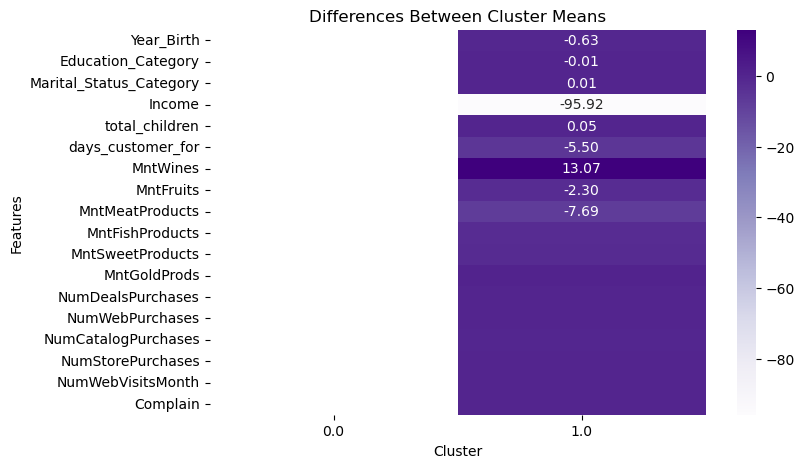

In [40]:
# Group the data by cluster
cluster_groups = new_df.groupby('Cluster')

# Calculate cluster means
cluster_means = cluster_groups.mean()
print(cluster_means)

# Calculate differences between cluster means
cluster_means_diff = cluster_means.diff()

# Visualize the differences
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_means_diff.T, annot=True, cmap='Purples', fmt=".2f")
plt.title('Differences Between Cluster Means')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()

In [41]:
AgglomerativeClustering?

Init signature:
AgglomerativeClustering(
    n_clusters=2,
    *,
    affinity='deprecated',
    metric=None,
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
    compute_distances=False,
)
Docstring:     
Agglomerative Clustering.

Recursively merges pair of clusters of sample data; uses linkage distance.

Read more in the :ref:`User Guide <hierarchical_clustering>`.

Parameters
----------
n_clusters : int or None, default=2
    The number of clusters to find. It must be ``None`` if
    ``distance_threshold`` is not ``None``.

affinity : str or callable, default='euclidean'
    The metric to use when calculating distance between instances in a
    feature array. If metric is a string or callable, it must be one of
    the options allowed by :func:`sklearn.metrics.pairwise_distances` for
    its metric parameter.
    If linkage is "ward", only "euclidean" is accepted.
    If "precomputed", a distance matrix (instead 

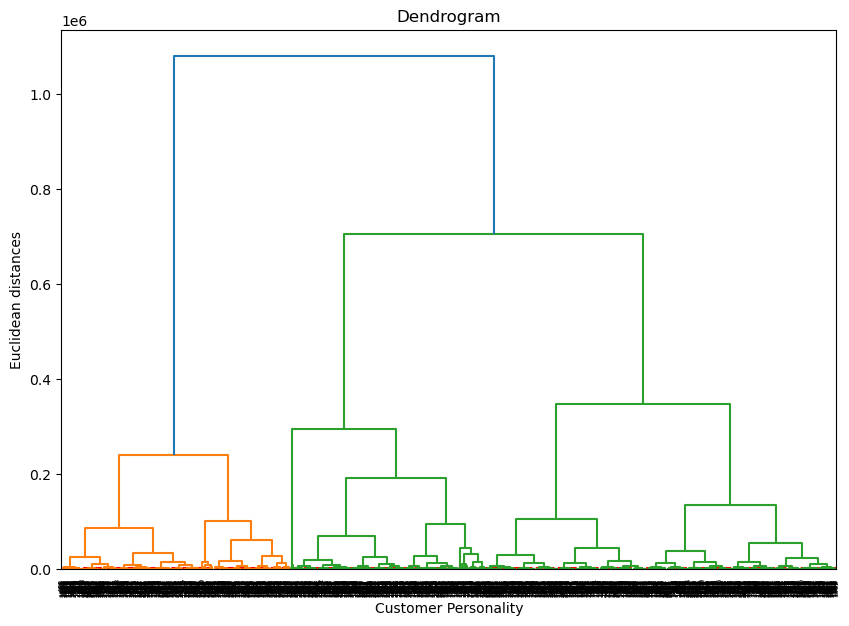

In [42]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title('Dendrogram')
plt.xlabel('Customer Personality')
plt.ylabel('Euclidean distances')
plt.axhline(y=825, color='r', linestyle='--')
plt.axhline(y=1575, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))